# Visualizing Missing Data

Python has many data visualization libraries for analyzing the data. Data analysis concentrates on the relationship between multiple attributes, their distributions, etc. But, frequently, many real-world datasets have missing values. It might be because data is unavailable, sensor failure, human error, among other causes. We need a way better understanding of the distribution of missing data.

Python has a library **`missingno`**, which provides graphs that visualize missing data from a different perspective. 

In [1]:
import missingno

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introducing some Datasets

Let's analyze some real datasets.

### Automobile Dataset

In [2]:
# Defining the headers
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", 
           "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", 
           "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", 
           "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [3]:
dfa = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
print(dfa.shape)                  
dfa.head()

(205, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
# Checking the number of missing values in each column
miss_val_a = dfa.isnull().sum()
miss_val_a

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [5]:
# Filtering the columns with missing values
miss_val_a[miss_val_a > 0]

normalized_losses    41
num_doors             2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [6]:
# Reducing the number of variables we will be working with (one without missing values and the others)
dfa = dfa[['symboling','normalized_losses','num_doors','bore','stroke','horsepower','peak_rpm','price']]

In [7]:
dfa.dtypes

symboling              int64
normalized_losses    float64
num_doors             object
bore                 float64
stroke               float64
horsepower           float64
peak_rpm             float64
price                float64
dtype: object

In [8]:
np.round(dfa.describe(),2)

,symboling,normalized_losses,bore,stroke,horsepower,peak_rpm,price
count,205.00,164.00,201.00,201.00,203.00,203.00,201.00
mean,0.83,122.00,3.33,3.26,104.26,5125.37,13207.13
std,1.25,35.44,0.27,0.32,39.71,479.33,7947.07
min,-2.00,65.00,2.54,2.07,48.00,4150.00,5118.00
25%,0.00,94.00,3.15,3.11,70.00,4800.00,7775.00
50%,1.00,115.00,3.31,3.29,95.00,5200.00,10295.00
75%,2.00,150.00,3.59,3.41,116.00,5500.00,16500.00
max,3.00,256.00,3.94,4.17,288.00,6600.00,45400.00


The `count` column has the number of valid cases.

### Titanic Dataset

In [9]:
dft = pd.read_csv('titanic.csv')
print(dft.shape)
dft.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Checking the number of missing values in each column
miss_val_t = dft.isnull().sum()
miss_val_t

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
dft = dft[['Survived','Age','Cabin','Embarked']]

In [12]:
dft.dtypes

Survived      int64
Age         float64
Cabin        object
Embarked     object
dtype: object

In [13]:
np.round(dft.describe(),2)

,Survived,Age
count,891.00,714.00
mean,0.38,29.70
std,0.49,14.53
min,0.00,0.42
25%,0.00,20.12
50%,0.00,28.00
75%,1.00,38.00
max,1.00,80.00


### Employee Dataset

In [14]:
dfe = pd.read_csv('employee_data.csv')
print(dfe.shape)
dfe.head()

(1000, 8)


,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0,NaN
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN


In [15]:
dfe.isnull().sum()

number                  0
first_name              1
last_name               1
gender                207
birth_date              1
employment_status     189
annual_salary           1
tax_file_no          1000
dtype: int64

Notice `tax_file_no` variable has no values! You should remove it from your analysis!

In [16]:
dfe.dtypes

number                 int64
first_name            object
last_name             object
gender                object
birth_date            object
employment_status     object
annual_salary        float64
tax_file_no          float64
dtype: object

In [17]:
np.round(dfe.describe(),2)

,number,annual_salary,tax_file_no
count,1000.00,999.00,0.0
mean,499.50,102017.20,NaN
std,285.86,27567.85,NaN
min,1.00,55003.00,NaN
25%,250.50,77720.00,NaN
50%,492.00,101133.00,NaN
75%,750.25,125829.00,NaN
max,999.00,149999.00,NaN


## Bar Chart

The bar chart displays a count of values per column, ignoring missing values. The height of the bar indicates how complete that column is.

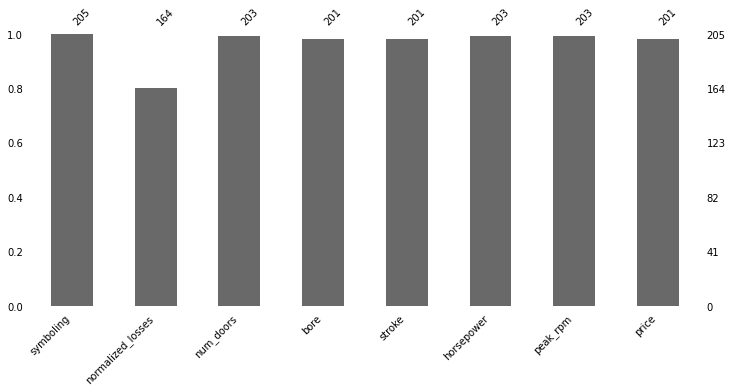

In [18]:
# Analyzing Automobile Dataset
missingno.bar(dfa, figsize=(12,5), fontsize=10);

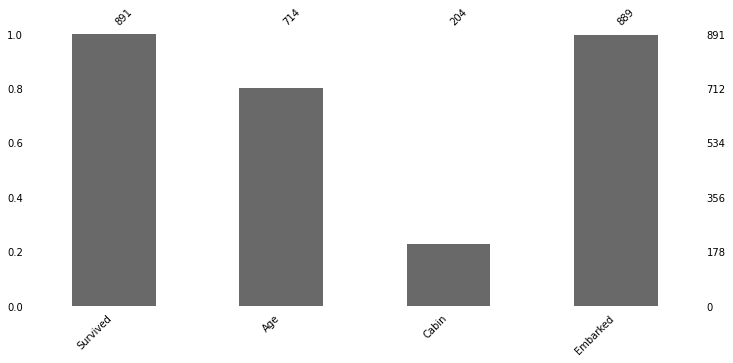

In [19]:
# Analyzing Titanic Dataset
missingno.bar(dft, figsize=(12,5), fontsize=10);

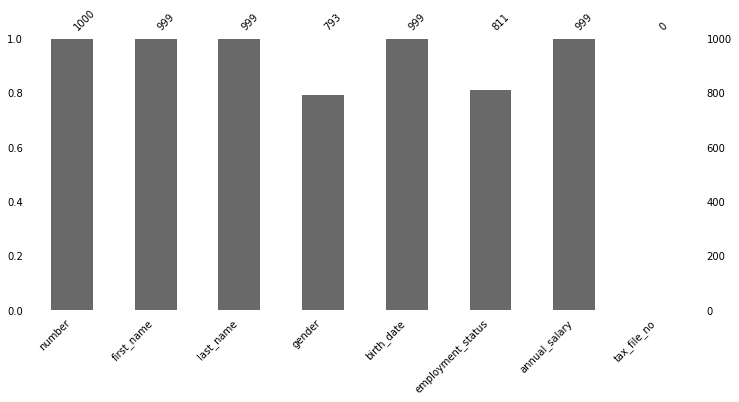

In [20]:
# Analyzing Employee Dataset
missingno.bar(dfe, figsize=(12,5), fontsize=10);

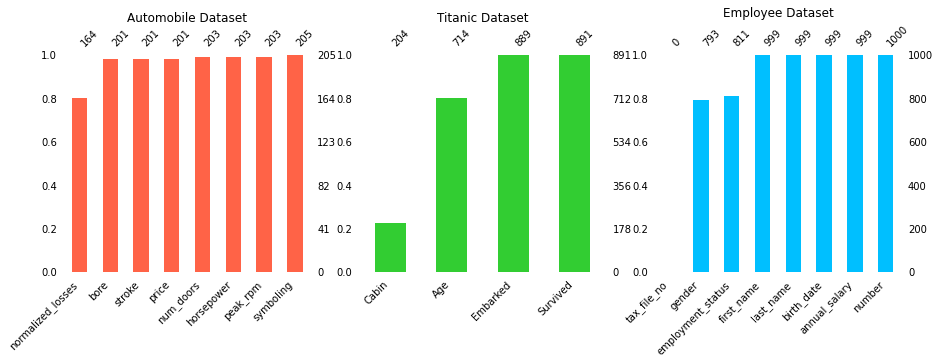

In [21]:
plt.subplot(131)
# Analyzing Automobile Dataset
missingno.bar(dfa, color="tomato", sort="ascending", figsize=(15,4), fontsize=10).set_title("Automobile Dataset")

plt.subplot(132)
# Analyzing Titanic Dataset
missingno.bar(dft, color="limeGreen", sort="ascending", figsize=(15,4), fontsize=10).set_title("Titanic Dataset")

plt.subplot(133)
# Analyzing Employee Dataset
missingno.bar(dfe, color="deepskyBlue", sort="ascending", figsize=(15,4), fontsize=10).set_title("Employee Dataset");

## Missing Data Matrix Chart

It lets us understand the data distribution within the whole dataset in all columns. That can help us understand the distribution of data better. It also displays sparkline, highlighting rows with the maximum and the minimum number of non-missing values in the dataset.

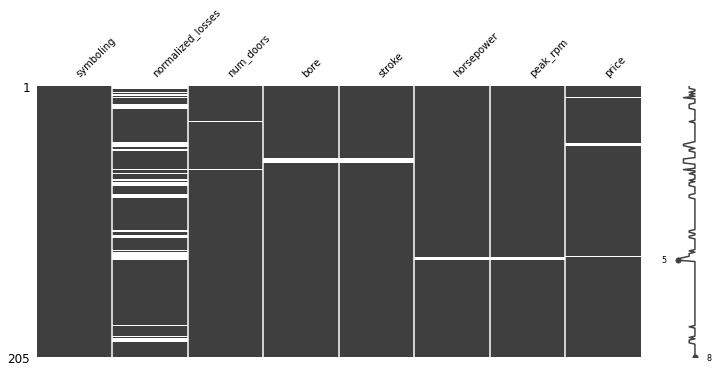

In [22]:
# Analyzing Automobile Dataset
missingno.matrix(dfa, figsize=(12,5), fontsize=10);

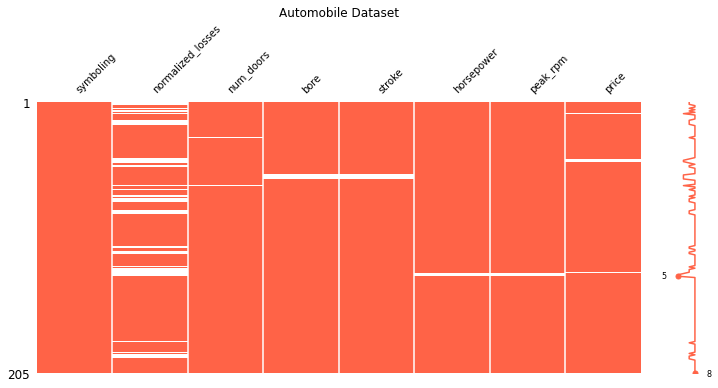

In [23]:
# Adding formating parameters to the plot
missingno.matrix(dfa, figsize=(12,5), fontsize=10, color=(1,99/255,71/255)).set_title("Automobile Dataset");

On the right side of the plot, there is a sparkline. It ranges from 0 on the left to the total number of columns on the right. The line will be at the top-right position when a row has valid values in each column. As missing values increase within that row, the line will move to the left. 

We can see that:
- the last row has an 8, and the sparkline is to the right. That means there are no missing values there.
- the sparkline in the first row is slightly shifted to the left. That indicates there is one missing value there.

In [24]:
# the last row has an 8, and the sparkline is to the right. That means there are no missing values there.
dfa.tail(1)

,symboling,normalized_losses,num_doors,bore,stroke,horsepower,peak_rpm,price
204,-1,95.0,four,3.78,3.15,114.0,5400.0,22625.0


In [25]:
# the sparkline in the first row is slightly shifted to the left. That indicates there is one missing value there.
dfa.head(1)

,symboling,normalized_losses,num_doors,bore,stroke,horsepower,peak_rpm,price
0,3,NaN,two,3.47,2.68,111.0,5000.0,13495.0


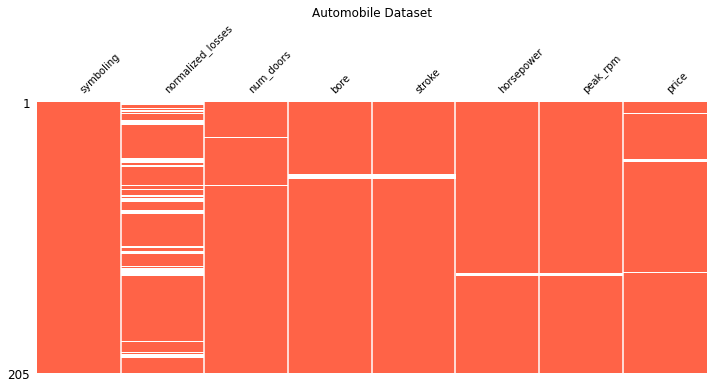

In [26]:
# Removing the sparkline
missingno.matrix(dfa, figsize=(12,5), fontsize=10, color=(1,99/255,71/255), 
                 sparkline=False).set_title("Automobile Dataset");

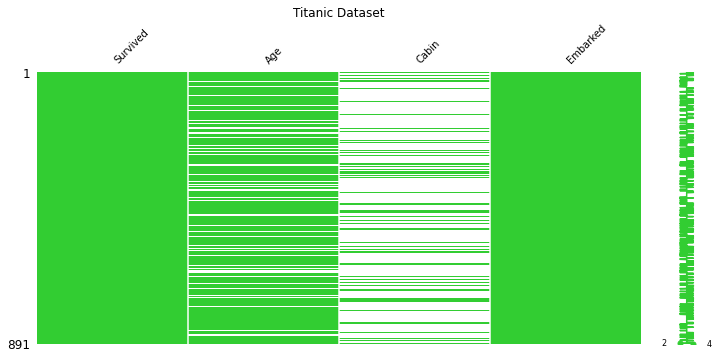

In [27]:
# Analyzing Titanic Dataset
missingno.matrix(dft, figsize=(12,5), fontsize=10, color=(50/255,205/255,50/255)).set_title("Titanic Dataset");

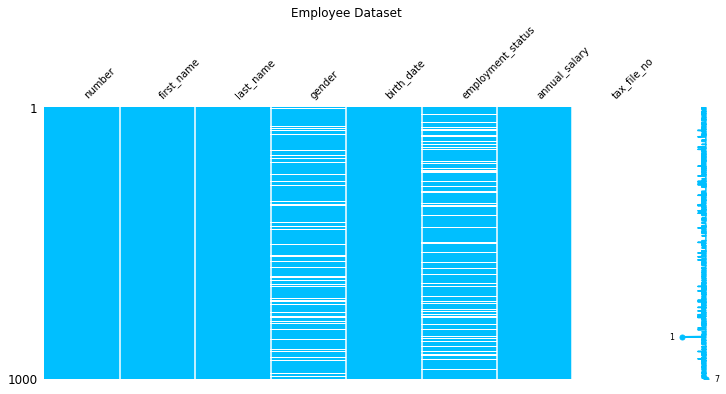

In [28]:
# Analyzing Employee Dataset
missingno.matrix(dfe, figsize=(12,5), fontsize=10, color=(0,191/255,1)).set_title("Employee Dataset");

Notice there is a row with only one valid value. We should drop it!

## Missing Data Heatmap

It displays a correlation of the nullity between columns of the dataset. It lets us understand how the missing data of one column is related to missing data in another column.
- Values close to +1 show that null values in one column correlate with those in the other.
- Values close to -1 show that null values in one column correlate negatively with null values in the other column. Null values in one column correspond with non-null values in the second column.
- Values close to 0 show no relationship between the null values in one column with another.

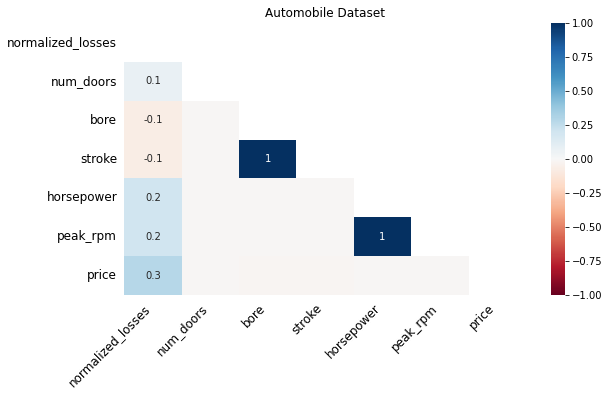

In [29]:
# Analyzing Automobile Dataset
missingno.heatmap(dfa, figsize=(9,5), fontsize=12).set_title("Automobile Dataset");

`bore` and `stroke` columns have 4 missing values in the same rows. The correlation between these two variables is 1.

In [30]:
print('Number of missing values of bore   =', dfa.bore.isnull().sum())
print('Number of missing values of stroke =', dfa.stroke.isnull().sum())
dfa[dfa.stroke.isna()]

Number of missing values of bore   = 4
Number of missing values of stroke = 4


,symboling,normalized_losses,num_doors,bore,stroke,horsepower,peak_rpm,price
55,3,150.0,two,NaN,NaN,101.0,6000.0,10945.0
56,3,150.0,two,NaN,NaN,101.0,6000.0,11845.0
57,3,150.0,two,NaN,NaN,101.0,6000.0,13645.0
58,3,150.0,two,NaN,NaN,135.0,6000.0,15645.0


In [31]:
print('Number of missing values of horsepower =', dfa.horsepower.isnull().sum())
print('Number of missing values of peak_rpm   =', dfa.peak_rpm.isnull().sum())
dfa[dfa.horsepower.isna()]

Number of missing values of horsepower = 2
Number of missing values of peak_rpm   = 2


,symboling,normalized_losses,num_doors,bore,stroke,horsepower,peak_rpm,price
130,0,NaN,four,3.46,3.9,NaN,NaN,9295.0
131,2,NaN,two,3.46,3.9,NaN,NaN,9895.0


`horsepower` and `peak_rpm` columns have 2 missing values in the same rows. The correlation between these two variables is 1. Notice that `normalized_losses` also has missing values in those rows, but the difference is that it has others missing values in other rows.

In [32]:
print('Number of missing values of normalized_losses   =', dfa.normalized_losses.isnull().sum())

Number of missing values of normalized_losses   = 41


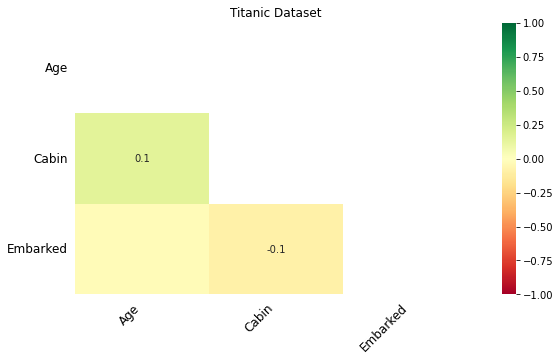

In [33]:
# Analyzing Titanic Dataset
missingno.heatmap(dft, figsize=(9,5), cmap="RdYlGn", fontsize=12).set_title("Titanic Dataset");

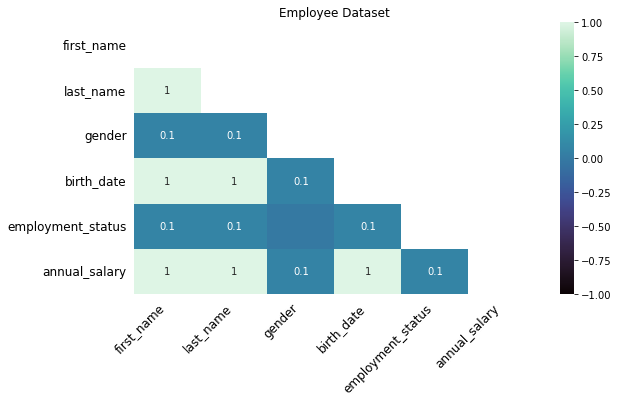

In [34]:
# Analyzing Employee Dataset
missingno.heatmap(dfe, figsize=(9,5), cmap="mako", fontsize=12).set_title("Employee Dataset");

## Dendrogram

The dendrogram plot provides a tree-like graph and groups together columns with strong nullity correlations.

The more separated the columns in the tree, the less likely the null values correlate between the columns.

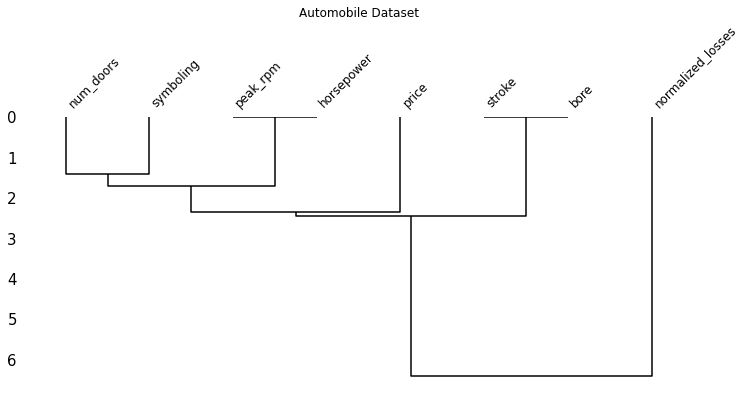

In [35]:
# Analyzing Automobile Dataset
missingno.dendrogram(dfa, figsize=(12,5), fontsize=12).set_title("Automobile Dataset");

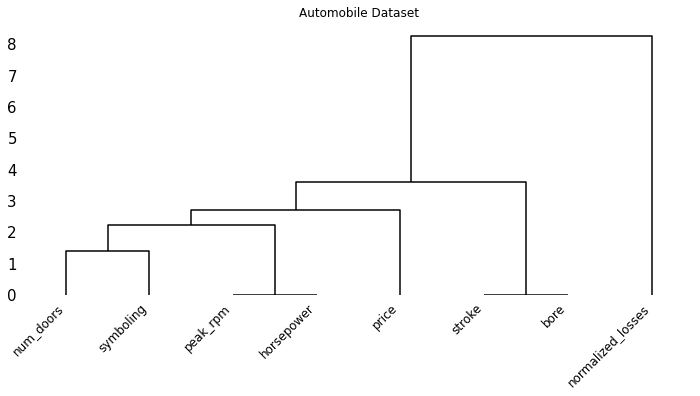

In [36]:
# Analyzing Automobile Dataset (method='ward')
missingno.dendrogram(dfa, figsize=(12,5), method='ward', orientation='top', 
                     fontsize=12).set_title("Automobile Dataset");

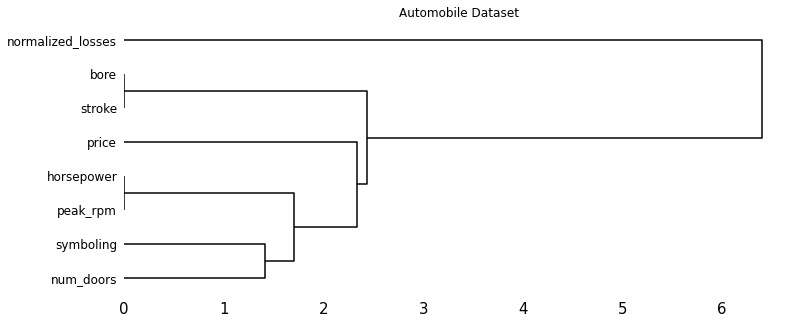

In [37]:
# Analyzing Automobile Dataset
missingno.dendrogram(dfa, figsize=(12,5), method='average', orientation='right', 
                     fontsize=12).set_title("Automobile Dataset");

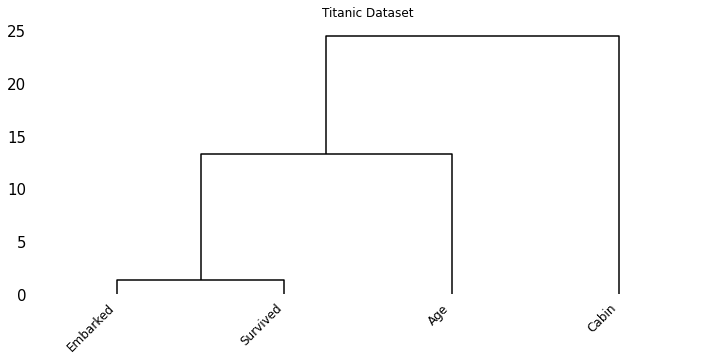

In [38]:
# Analyzing Titanic Dataset
missingno.dendrogram(dft, figsize=(12,5), method='centroid', orientation='top',
                     fontsize=12).set_title("Titanic Dataset");

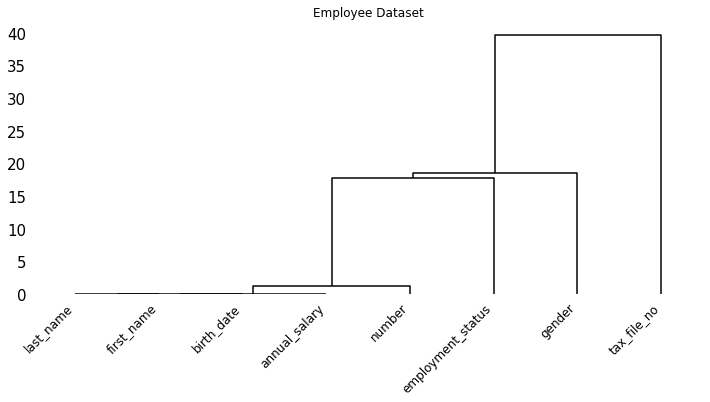

In [39]:
# Analyzing Employee Dataset
missingno.dendrogram(dfe, figsize=(12,5), method='ward', orientation='top',
                     fontsize=12).set_title("Employee Dataset");

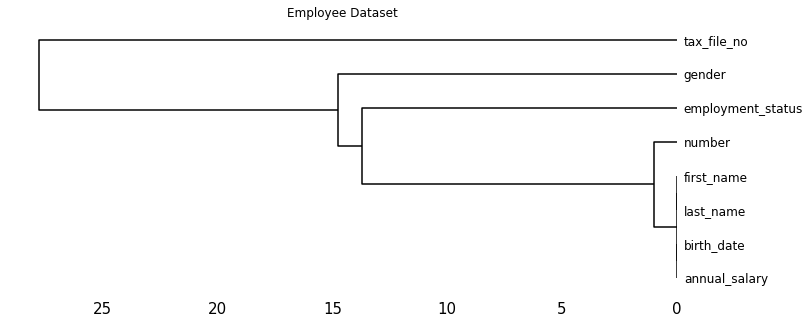

In [40]:
# Analyzing Employee Dataset
missingno.dendrogram(dfe, figsize=(12,5), method='median', orientation='left',
                     fontsize=12).set_title("Employee Dataset");

References:

- Bilogur, (2018). Missingno: a missing data visualization suite. Journal of Open Source Software, 3(22), 547, https://doi.org/10.21105/joss.00547
- Missingno: a missing data visualization suite, Jupyter Notebook Python Submitted 27 October 2017 • Published 27 February 2018, https://joss.theoj.org/papers/10.21105/joss.00547 
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc. chapter 3
